In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from tqdm import tqdm


In [30]:
Ms = 1*u.solMass

rmin = 9.5*u.au
rmax = 10.5*u.au

Ncells = 10000
rcs = np.linspace(rmin, rmax, Ncells)

alpha = 1e-2
h0 = 0.040613
flaring = 0.25

sigma0 = 20*u.g/u.cm**2

particle_density = 2.65*u.g/u.cm**3
particle_size = 1e-5*u.cm

h = h0*rcs.to_value("au")**flaring

vK = np.sqrt(const.G*Ms/rcs)
OmegaK = vK/rcs
H = h*rcs
cs = h*vK

sigmag = sigma0 * rcs.to_value("au")**-1
rho = sigmag / (np.sqrt(2*np.pi)*H)

tstop = particle_size*particle_density/(rho*cs)
St = tstop * OmegaK

# Youdin & Lithwick 2007 Eq. 37
Sc = (1 + St**2)**2  / (1 + 4*St**2)

Dg = alpha*cs*H
Dd = Dg/Sc


100%|██████████| 5/5 [00:00<00:00, 570.76it/s]


(0.001, 1)

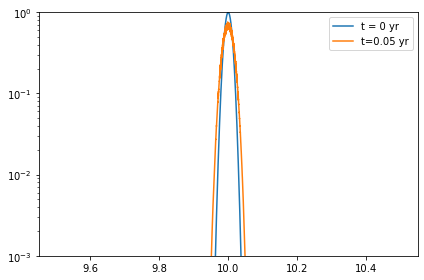

In [31]:
rhod = np.exp(- 0.5*(rcs.to_value("au") - 10)**2/(0.01**2))

t = 0*u.yr
dt = 0.01*u.yr
tfinal = 0.05*u.yr

t_save = 100*u.yr
N_save = int((tfinal / t_save).decompose()) + 1
times_save = np.linspace(0, tfinal, N_save)
saves = np.zeros((len(times_save), Ncells))


fig, ax = plt.subplots()

ax.plot(rcs, rhod, label = "t = 0 yr")

nplot = 0

saves[0] = rhod

Nsteps = int(tfinal/dt)
for n in tqdm(range(Nsteps)):
    X = np.gradient(rcs*rhod, rcs)
    rhs = np.gradient(Dd * X, rcs)/rcs
    rhs = rhs.decompose()
    rhod += (dt*rhs).decompose().value
    
    t += dt

ax.plot(rcs, rhod, label = f"t={t:.3g}")
    

ax.legend()
ax.set_yscale("log")
ax.set_ylim(bottom=1e-3, top=1)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/numpy/lib/function_base.py:1084: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:1085: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:1086: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:1092: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:1084: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:1085: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) /

KeyboardInterrupt: 

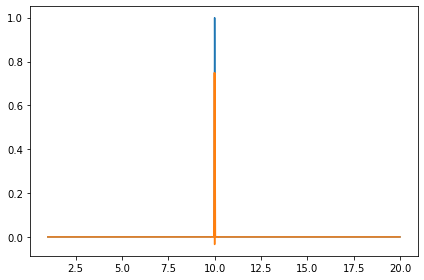

In [33]:
rhod = np.exp(- 0.5*(rcs.to_value("au") - 10)**2/(0.01**2))

t = 0*u.yr
dt = 0.1*u.yr
tfinal = 1000*u.yr

t_save = 100*u.yr
N_save = int((tfinal / t_save).decompose()) + 1
times_save = np.linspace(0, tfinal, N_save)
saves = np.zeros((len(times_save), Ncells))


fig, ax = plt.subplots()

ax.plot(rcs, rhod, label = "t = 0 yr")

nplot = 0

saves[0] = rhod


for n in tqdm(range(N_save-1)):
    while t < times_save[n+1]:
        
        X = np.gradient(rcs*rhod, rcs)
        rhs = np.gradient(Dd * X, rcs)/rcs
        rhs = rhs.decompose()
        rhod += (dt*rhs).decompose().value
        
        t += dt
        
        if t > nplot*tfinal/10:
            ax.plot(rcs, rhod, label = f"t={t:.3g}")
            nplot += 1
    
    saves[n+1] = rhod

ax.legend()
ax.set_yscale("log")
ax.set_ylim(bottom=1e-3, top=1)

(0.0, 20.0)

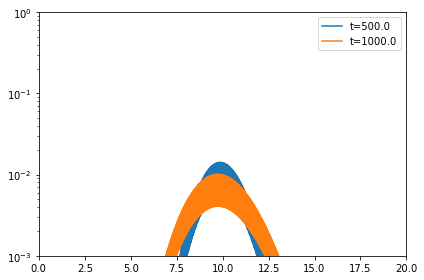

In [18]:
fig, ax = plt.subplots()

times = times_save.to_value("yr")

tplot = 500
n = np.argmin(np.abs(times - tplot))
ax.plot(rcs, saves[n], label = f"t={times[n]}")

tplot = 1000
n = np.argmin(np.abs(times - tplot))
ax.plot(rcs, saves[n], label = f"t={times[n]}")

ax.set_yscale("log")
ax.set_ylim(bottom=1e-3,top=1)
ax.legend(loc="best")
ax.set_xlim(left=0, right=20)

(0.0, 20.0)

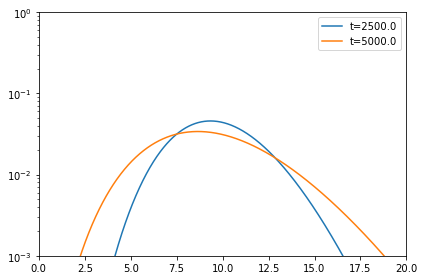

In [15]:
fig, ax = plt.subplots()

times = times_save.to_value("yr")

tplot = 2500
n = np.argmin(np.abs(times - tplot))
ax.plot(rcs, saves[n], label = f"t={times[n]}")

tplot = 5000
n = np.argmin(np.abs(times - tplot))
ax.plot(rcs, saves[n], label = f"t={times[n]}")

ax.set_yscale("log")
ax.set_ylim(bottom=1e-3,top=1)
ax.legend(loc="best")
ax.set_xlim(left=0, right=20)

In [170]:
np.save("analytic_profiles", saves)
np.save("analytic_times", times_save.to_value("yr"))
np.save("analytic_radii", rcs.to_value("au"))

In [171]:
ls = np.load("analytic_profiles.npy")
lt = np.load("analytic_times.npy")
lr = np.load("analytic_radii.npy")

(0.0, 20.0)

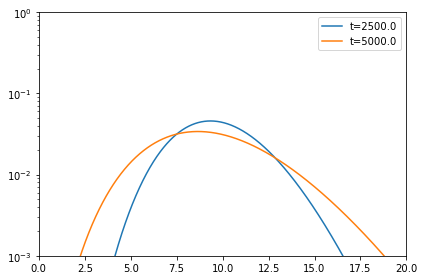

In [ ]:
fig, ax = plt.subplots()

tplot = 2500
n = np.argmin(np.abs(lt - tplot))
ax.plot(rcs, ls[n], label = f"t={lt[n]}")

tplot = 5000
n = np.argmin(np.abs(lt - tplot))
ax.plot(rcs, ls[n], label = f"t={lt[n]}")

ax.set_yscale("log")
ax.set_ylim(bottom=1e-3,top=1)
ax.legend(loc="best")
ax.set_xlim(left=0, right=20)

In [158]:
lt

array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
         800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
        1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
        2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
        3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
        4000.,  4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,
        4800.,  4900.,  5000.,  5100.,  5200.,  5300.,  5400.,  5500.,
        5600.,  5700.,  5800.,  5900.,  6000.,  6100.,  6200.,  6300.,
        6400.,  6500.,  6600.,  6700.,  6800.,  6900.,  7000.,  7100.,
        7200.,  7300.,  7400.,  7500.,  7600.,  7700.,  7800.,  7900.,
        8000.,  8100.,  8200.,  8300.,  8400.,  8500.,  8600.,  8700.,
        8800.,  8900.,  9000.,  9100.,  9200.,  9300.,  9400.,  9500.,
        9600.,  9700.,  9800.,  9900., 10000., 10100., 10200., 10300.,
       10400., 10500., 10600., 10700., 10800., 10900., 11000., 11100.,
      